<a href="https://colab.research.google.com/github/RaviKcse08/datascience_projs/blob/main/TF_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#include tensorflow datasets API
!pip install -U tensorflow_datasets

In [67]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [68]:
#dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#train_dataset, test_dataset = dataset['train'], dataset['test']


dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [69]:
class_names = metadata.features['label'].names


In [70]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
#print("Class names: {}".format(class_names))
print(metadata.features['label'].names)
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of training examples: 60000
Number of test examples:     10000


In [71]:
#normalization function
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset = train_dataset.cache()


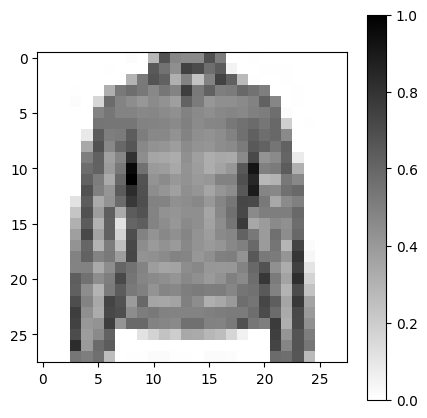

In [72]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
#image = image.numpy().reshape((28,28))

# Plot the image - piece of mnist
plt.figure(figsize=(5,5))
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

# plt.imshow(image, cmap=plt.cm.binary)
# plt.colorbar()
# plt.grid(False)
# plt.show()

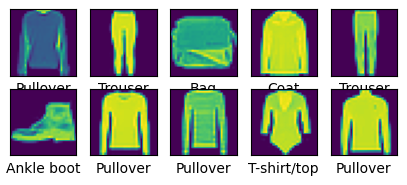

In [73]:
plt.figure(figsize=(5,5))
for i, (image, label) in enumerate(train_dataset.take(10)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.xlabel(class_names[label])
plt.show()

In [74]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

In [75]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [76]:
# #BATCH_SIZE = 32
# train_dataset = train_dataset.take(2000)
# #test_dataset = test_dataset.cache().batch(BATCH_SIZE)

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [77]:
#model.fit(train_dataset, epochs=1)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4944 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3083 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8912


In [78]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3487 - accuracy: 0.8740
Accuracy on test dataset: 0.8740000128746033


In [79]:
for imag, label in test_dataset.take(1):
  pred = model.predict(imag)
  print(pred[0])

1/1 [==============================] - 0s 57ms/step
[3.6846832e-05 6.4564862e-05 1.2799739e-02 1.0700733e-06 9.7902876e-01
 1.9591366e-09 8.0640921e-03 5.8508873e-09 5.0630993e-06 7.9633180e-09]


In [80]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 13ms/step


In [81]:
print(predictions)

[[3.68468318e-05 6.45648615e-05 1.27997389e-02 1.07007327e-06
  9.79028761e-01 1.95913663e-09 8.06409214e-03 5.85088733e-09
  5.06309925e-06 7.96331801e-09]
 [4.40178428e-06 1.83131149e-07 2.41153617e-03 9.47353129e-08
  8.21728587e-01 6.61773580e-10 1.75854653e-01 4.52040710e-10
  5.16732143e-07 3.44826656e-09]
 [2.64984446e-05 1.99115470e-06 2.92188020e-06 3.95556413e-07
  5.55138627e-07 2.97983419e-02 1.95616230e-05 1.04569972e-01
  1.24646438e-04 8.65455091e-01]
 [1.16551091e-05 1.47082787e-07 4.25860435e-07 2.33325981e-09
  2.50415972e-08 1.57523842e-04 2.23562415e-06 8.26219261e-01
  3.37047709e-06 1.73605278e-01]
 [4.89572223e-08 4.16131218e-09 1.02283408e-08 1.70576574e-11
  3.87453791e-10 9.99998391e-01 4.15576977e-08 1.11644120e-07
  2.08971205e-08 1.25832958e-06]
 [1.25657413e-08 9.99999583e-01 5.57494773e-10 2.13853326e-07
  1.25816726e-07 2.35101108e-17 7.44072082e-10 2.10402899e-15
  4.58738408e-10 1.09407078e-13]
 [9.95559812e-01 8.20557311e-09 5.53189493e-05 1.86839912e

In [82]:
print(predictions[0])

[3.6846832e-05 6.4564862e-05 1.2799739e-02 1.0700733e-06 9.7902876e-01
 1.9591366e-09 8.0640921e-03 5.8508873e-09 5.0630993e-06 7.9633180e-09]


In [83]:
print(np.argmax(predictions[0]))

4


In [84]:
print(class_names[np.argmax(predictions[0])])

Coat


In [85]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

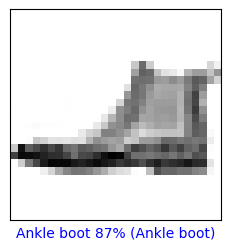

In [87]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)